# CLICK-ID EDA and Data Preprocessing

## EDA

### Load Dataset

In [23]:
import pandas as pd

file_id = '1xfIr_znkZslb36kZY7IJtNMoYQK0YsBj'
download_url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(download_url)
df.head()

,title,content,source,date,time,category,sub-category,url,label,label_score
0,Anak Penjaga Kebersihan Masjid Lantamal 1 Bela...,",,,Setelah dihebohkan dengan kemunculan calon ...",posmetro-medan.com,"Oktober 19, 2019",-,Berita Viral,-,https://www.posmetro-medan.com/2019/10/anak-pe...,clickbait,1
1,Wakil Menkeu : Kenaikan Iuran BPJS Tidak Akan ...,",,,Jelang akhir tahun kabar kenaikan tarif iu...",posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/wakil-m...,non-clickbait,0
2,"Miliki Reputasi Kualitas Dunia, Powerbank G-Po...",",,,,,,,,,,,,,,,loading...",posmetro-medan.com,"Oktober 08, 2019",-,Teknologi,-,https://www.posmetro-medan.com/2019/10/miliki-...,non-clickbait,0
3,"Pendukung Jokowi Ngaku Diculik di Masjid, Ini ...",",,,Pengurus Dewan Kemakmuran Masjid (DKM) Al-F...",posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/penduku...,clickbait,1
4,"Sebentar Lagi, Minyak Curah Dilarang, Warga Ha...",",,,Menteri Perdagangan Enggartiasto Lukita mel...",posmetro-medan.com,"Oktober 07, 2019",-,Berita Utama,-,https://www.posmetro-medan.com/2019/10/sebenta...,clickbait,1


### Initial Data Inspection
Check data types of each column, and identify the number of missing values for each column.


In [24]:
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15319 entries, 0 to 15318
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         15319 non-null  object
 1   content       15275 non-null  object
 2   source        15319 non-null  object
 3   date          15319 non-null  object
 4   time          15319 non-null  object
 5   category      15319 non-null  object
 6   sub-category  15319 non-null  object
 7   url           15319 non-null  object
 8   label         15319 non-null  object
 9   label_score   15319 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 1.2+ MB
None

Missing values per column:
 title            0
content         44
source           0
date             0
time             0
category         0
sub-category     0
url              0
label            0
label_score      0
dtype: int64


### Visualize Data Distribution



In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


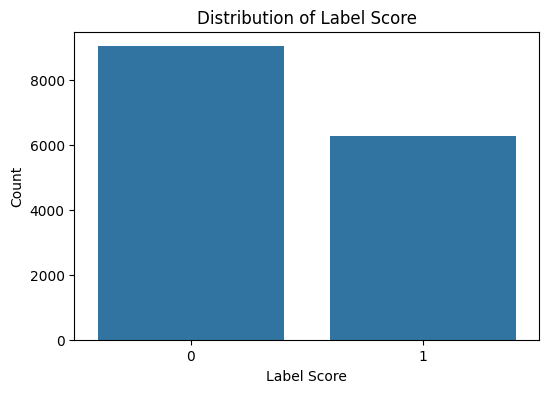

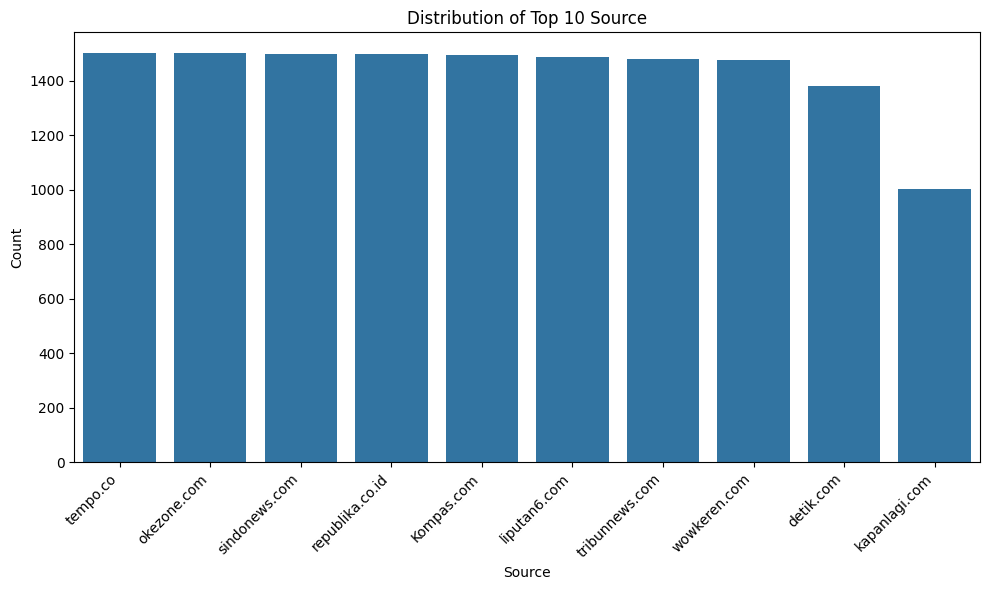

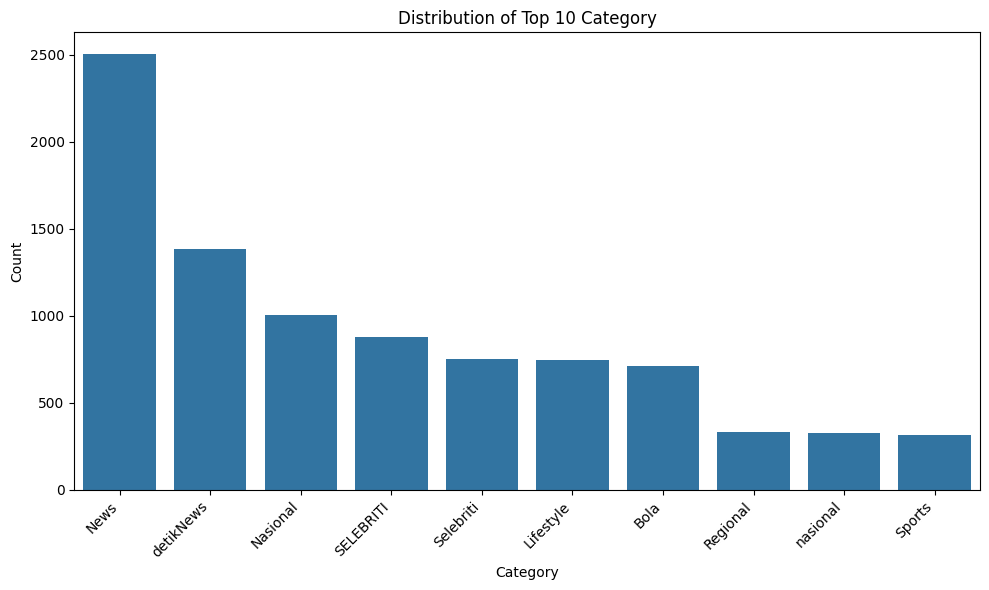

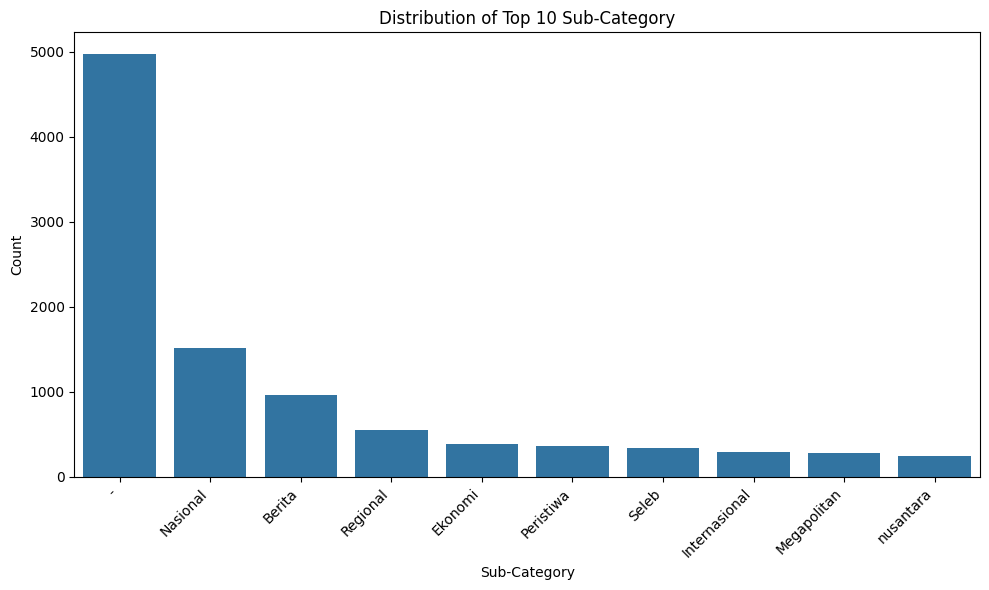

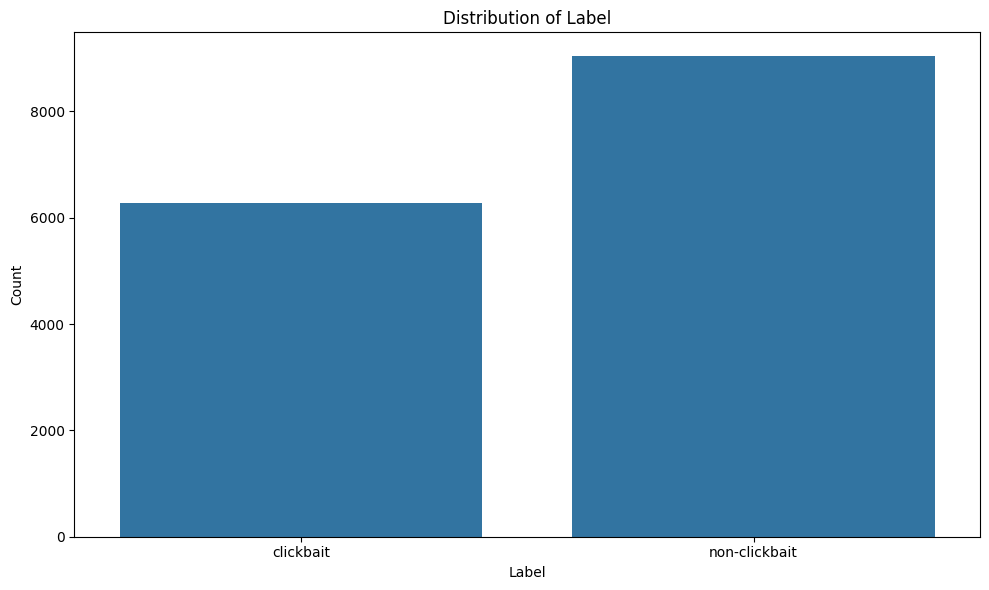

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='label_score')
plt.title('Distribution of Label Score')
plt.xlabel('Label Score')
plt.ylabel('Count')
plt.show()

categorical_cols = ['source', 'category', 'sub-category', 'label']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    if col in ['source', 'category', 'sub-category']:
        # For columns with potentially many unique values, plot top 10
        top_n = df[col].value_counts().nlargest(10)
        sns.barplot(x=top_n.index, y=top_n.values)
        plt.title(f'Distribution of Top 10 {col.replace('_', ' ').title()}')
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:
        # For 'label' and other columns with fewer unique values
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col.replace('_', ' ').title()}')
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

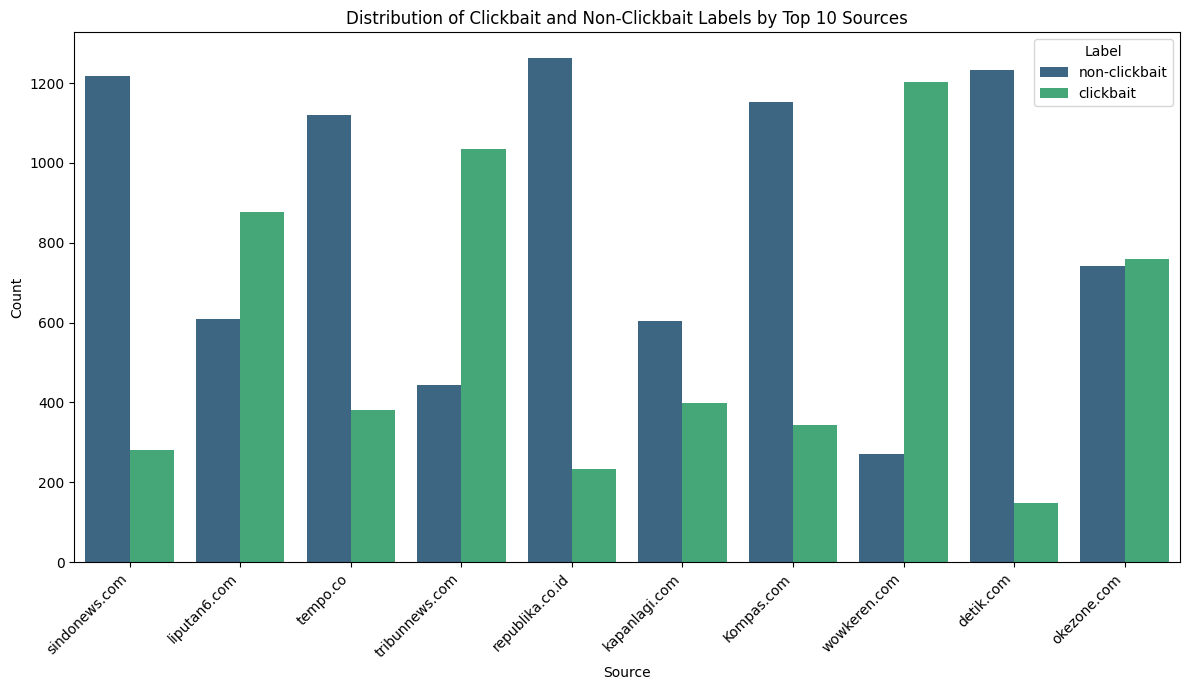

In [27]:
plt.figure(figsize=(12, 7))
top_10_sources = df['source'].value_counts().nlargest(10).index
df_filtered = df[df['source'].isin(top_10_sources)]
sns.countplot(data=df_filtered, x='source', hue='label', palette='viridis')
plt.title('Distribution of Clickbait and Non-Clickbait Labels by Top 10 Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

## Content Examples for Top 10 Sources

In [28]:
top_10_sources = df['source'].value_counts().nlargest(10).index.tolist()

for source_name in top_10_sources:
    # Find the first entry for this source
    example_row = df[df['source'] == source_name].iloc[0]
    print(f"--- Source: {source_name} ---")
    print(f"Content: {example_row['content']}")
    print("\n")

--- Source: tempo.co ---
Content: , , - Badan Pengelola Transportasi Jabodetabek mengusulkan perpanjangan trase untuk kereta ringan atau , (,) Jabodebek untuk menuju ke kawasan pariwisata puncak di Bogor.,Kepala Badan Pengelola Transportasi Jabodetabek (BPTJ) Bambang Prihartono mengatakan, perpanjangan trase LRT perlu dilakukan mengingat kondisi lalu lintas semakin padat dan ,“Sekarang kami masih fokus pembangunan LRT Cibubur-Dukuh Atas. Setelah itu, terbangun kami akan memikirkan agar dari Cibubur bisa terkoneksi ke Bogor,” ujarnya di Gunung Putri, Bogor, Selasa 17 September 2019.,Bambang menuturkan perpanjangan trase LRT Jakarta, Bogor, Depok, Bekasi (Jabodebek) dilakukan dengan menghubungkan Cibubur dengan Baranangsiang, Bogor. Setelah itu, dari Baranangsiang akan dihubungkan lagi hingga ke kawasan pariwisata Puncak, Bogor.,Meskipun demikian, dia mengungkapkan saat ini BPTJ belum melakukan studi kelayakan. BPTJ akan terlebih dahulu berkoordinasi dengan pemerintah daerah setempat men

## Preprocessing

### Handle Missing Values

In [29]:
df['content'] = df['content'].fillna('')
print("Missing values after handling:", df.isnull().sum())

Missing values after handling: title           0
content         0
source          0
date            0
time            0
category        0
sub-category    0
url             0
label           0
label_score     0
dtype: int64


### Clean 'content' column from leading special characters

In [30]:
import re

# Function to clean content
def clean_content(text):
    # Remove leading commas, spaces, or hyphens
    text = re.sub(r"^[\s,-]*", "", text)
    return text

# Apply the cleaning function to the 'content' column
df['content'] = df['content'].apply(clean_content)

print("Content column cleaned. Displaying first 5 rows of cleaned content examples:")
for i in range(5):
    print(f"\n--- Example {i+1} ---")
    print(f"Original content (first 100 chars): {df.iloc[i]['content'][:100]}...")

df.head()

Content column cleaned. Displaying first 5 rows of cleaned content examples:

--- Example 1 ---
Original content (first 100 chars): Setelah dihebohkan dengan kemunculan calon taruna Enzo Zenz yang mahir berbahasa Prancis dan hafal Q...

--- Example 2 ---
Original content (first 100 chars): Jelang akhir tahun kabar  kenaikan tarif iuran Badan Penyelenggara Jaminan Sosial (BPJS) Kesehatan b...

--- Example 3 ---
Original content (first 100 chars): loading......

--- Example 4 ---
Original content (first 100 chars): Pengurus Dewan Kemakmuran Masjid (DKM) Al-Falaah meminta Ninoy Karundeng untuk duduk bersama membukt...

--- Example 5 ---
Original content (first 100 chars): Menteri Perdagangan Enggartiasto Lukita melarang peredaran minyak curah di pasar masyarakat mulai 1 ...


,title,content,source,date,time,category,sub-category,url,label,label_score
0,Anak Penjaga Kebersihan Masjid Lantamal 1 Bela...,Setelah dihebohkan dengan kemunculan calon tar...,posmetro-medan.com,"Oktober 19, 2019",-,Berita Viral,-,https://www.posmetro-medan.com/2019/10/anak-pe...,clickbait,1
1,Wakil Menkeu : Kenaikan Iuran BPJS Tidak Akan ...,Jelang akhir tahun kabar kenaikan tarif iuran...,posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/wakil-m...,non-clickbait,0
2,"Miliki Reputasi Kualitas Dunia, Powerbank G-Po...",loading...,posmetro-medan.com,"Oktober 08, 2019",-,Teknologi,-,https://www.posmetro-medan.com/2019/10/miliki-...,non-clickbait,0
3,"Pendukung Jokowi Ngaku Diculik di Masjid, Ini ...",Pengurus Dewan Kemakmuran Masjid (DKM) Al-Fala...,posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/penduku...,clickbait,1
4,"Sebentar Lagi, Minyak Curah Dilarang, Warga Ha...",Menteri Perdagangan Enggartiasto Lukita melara...,posmetro-medan.com,"Oktober 07, 2019",-,Berita Utama,-,https://www.posmetro-medan.com/2019/10/sebenta...,clickbait,1


### Handling "Loading" Text in Content

In [36]:
loading_content = df[df['content'].str.contains('loading', case=False, na=False)]
display(loading_content[['title', 'content', 'source']])

,title,content,source
0,Anak Penjaga Kebersihan Masjid Lantamal 1 Bela...,Setelah dihebohkan dengan kemunculan calon tar...,posmetro-medan.com
1,Wakil Menkeu : Kenaikan Iuran BPJS Tidak Akan ...,Jelang akhir tahun kabar kenaikan tarif iuran...,posmetro-medan.com
2,"Miliki Reputasi Kualitas Dunia, Powerbank G-Po...",loading...,posmetro-medan.com
3,"Pendukung Jokowi Ngaku Diculik di Masjid, Ini ...",Pengurus Dewan Kemakmuran Masjid (DKM) Al-Fala...,posmetro-medan.com
4,"Sebentar Lagi, Minyak Curah Dilarang, Warga Ha...",Menteri Perdagangan Enggartiasto Lukita melara...,posmetro-medan.com
...,...,...,...
7781,Seluruh Steel Box Girder Terpasang di Jalan La...,"REPUBLIKA.CO.ID, KARAWANG -- PT Jasa Marga (Pe...",republika.co.id
10263,"Pasca-Kecelakaan di Tol Cipularang, Kemenhub A...","(Kemenhub) mengancam akan mengandangkan , mil...",Kompas.com
10272,Kemenhub Kumpulkan 200 Operator Dump Truck Sor...,"Kementerian Perhubungan ( ,) akan mengumpulkan...",Kompas.com
10513,Kemenhub Minta Pengusaha Normalisasi Dump Truc...,"Kementerian Perhubungan ( ,) meminta pengusaha...",Kompas.com


In [38]:
df['content'] = df['content'].str.replace('loading', '', case=False, regex=True)
df['content'] = df['content'].str.strip()

In [39]:
check_remaining = df[df['content'].str.contains('loading', case=False, na=False)]
display(check_remaining)

,title,content,source,date,time,category,sub-category,url,label,label_score


### Handling Non Text Content

In [40]:
import re

# Function to check if content contains only non-alphabetic characters (after removing punctuation and digits)
def has_only_non_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits
    text = re.sub(r'\d', '', text)
    # Check if the remaining text is empty or only whitespace
    return text.strip() == ''

# Apply the function to the 'content' column to filter the DataFrame
non_text_content_df = df[df['content'].apply(has_only_non_text)]

print(f"Found {len(non_text_content_df)} rows with content containing only non-string text (excluding punctuation and numbers):")
display(non_text_content_df[['title', 'content', 'source']].head())

Found 79 rows with content containing only non-string text (excluding punctuation and numbers):


,title,content,source
2,"Miliki Reputasi Kualitas Dunia, Powerbank G-Po...",...,posmetro-medan.com
10,Inilah 3 Lokasi di Kota Medan dengan Harga Rum...,...,posmetro-medan.com
46,"Ikut Demo, Anak STM Dimarahi Emak, ""Nggak kasi...",...,posmetro-medan.com
73,"Hari Ketiga, Final Gala Catur Emas Penuh Kejutan",...,posmetro-medan.com
77,"Kalahkan Master Nasional, Sukarnedi Sabet Gela...",...,posmetro-medan.com


In [43]:
for index, row in non_text_content_df.iterrows():
    print(f"Title: {row['title']}")
    print(f"Content: '{row['content']}'")
    print(f"Source: {row['source']}")
    print("--------------------------------------------------")

Title: Miliki Reputasi Kualitas Dunia, Powerbank G-Power Diluncurkan di Indonesia
Content: '...'
Source: posmetro-medan.com
--------------------------------------------------
Title: Inilah 3 Lokasi di Kota Medan dengan Harga Rumah yang Fantastis!
Content: '...'
Source: posmetro-medan.com
--------------------------------------------------
Title: Ikut Demo, Anak STM Dimarahi Emak, "Nggak kasih ampun kalau yang begini!"
Content: '...'
Source: posmetro-medan.com
--------------------------------------------------
Title: Hari Ketiga, Final Gala Catur Emas Penuh Kejutan
Content: '...'
Source: posmetro-medan.com
--------------------------------------------------
Title: Kalahkan Master Nasional, Sukarnedi Sabet Gelar Gala catur Emas II 2019
Content: '...'
Source: posmetro-medan.com
--------------------------------------------------
Title: MIS Sabet Juara Umum 2 Kejuaraan Sepatu Roda Piala Wali Kota Pariaman
Content: '...'
Source: posmetro-medan.com
----------------------------------------------

In [44]:
initial_rows = len(df)
df = df.drop(non_text_content_df.index)

print(f"Removed {initial_rows - len(df)} rows. New DataFrame shape: {df.shape}")
display(df.head())

Removed 79 rows. New DataFrame shape: (15240, 10)


,title,content,source,date,time,category,sub-category,url,label,label_score
0,Anak Penjaga Kebersihan Masjid Lantamal 1 Bela...,Setelah dihebohkan dengan kemunculan calon tar...,posmetro-medan.com,"Oktober 19, 2019",-,Berita Viral,-,https://www.posmetro-medan.com/2019/10/anak-pe...,clickbait,1
1,Wakil Menkeu : Kenaikan Iuran BPJS Tidak Akan ...,Jelang akhir tahun kabar kenaikan tarif iuran...,posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/wakil-m...,non-clickbait,0
3,"Pendukung Jokowi Ngaku Diculik di Masjid, Ini ...",Pengurus Dewan Kemakmuran Masjid (DKM) Al-Fala...,posmetro-medan.com,"Oktober 07, 2019",-,nasional,-,https://www.posmetro-medan.com/2019/10/penduku...,clickbait,1
4,"Sebentar Lagi, Minyak Curah Dilarang, Warga Ha...",Menteri Perdagangan Enggartiasto Lukita melara...,posmetro-medan.com,"Oktober 07, 2019",-,Berita Utama,-,https://www.posmetro-medan.com/2019/10/sebenta...,clickbait,1
5,Ya Tuhan... Hubungan Sedarah di Sumut Meningka...,"Miris, meski dianggap tabu dalam agama maupun ...",posmetro-medan.com,"Oktober 07, 2019",-,Berita Sumut,-,https://www.posmetro-medan.com/2019/10/ya-tuha...,clickbait,1


### Final Summary

In [47]:
average_content_length = df['content'].apply(len).mean()
print(f"The average length of the 'content' column is: {average_content_length:.2f} characters")

The average length of the 'content' column is: 1829.55 characters


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded, containing 15,319 entries and 10 columns.
*   Most columns (`title`, `content`, `source`, `date`, `time`, `category`, `sub-category`, `url`, `label`) are of `object` dtype, while `label_score` is `int64`.
*   Initially, only the `content` column had missing values (44 entries). All other columns were complete.
*   Descriptive statistics for the numerical `label_score` column showed a count of 15,319, a mean of approximately 0.41, a standard deviation of 0.49, and values ranging from 0 to 1. This suggests a binary or heavily skewed distribution for this column.
*   Visualizations confirmed that `label_score` is predominantly distributed between 0 and 1. Categorical features like 'source', 'category', and 'sub-category' showed varying distributions, often with a few dominant categories.
*   All 44 missing values in the `content` column were successfully handled by replacing them with empty strings, resulting in a dataset with no remaining missing values.

### Insights or Next Steps

*   The `label_score` column, being binary (0 or 1), strongly indicates that the dataset is prepared for a classification task, possibly related to sentiment or authenticity analysis given the nature of the other columns.
*   The `content` column, now cleaned of missing values, is a prime candidate for natural language processing (NLP) tasks such as text classification, topic modeling, or sentiment analysis. Further preprocessing like tokenization, stop-word removal, and vectorization will be necessary.


## Result

In [45]:
# Save the entire final DataFrame to a CSV file
df.to_csv('final_dataset.csv', index=False)
print("Entire DataFrame saved to 'final_dataset.csv'")

Entire DataFrame saved to 'final_dataset.csv'


In [46]:
# Save a subset of the DataFrame (title, content, label) to a CSV file
df[['title', 'content', 'label']].to_csv('final_dataset_subset.csv', index=False)
print("Subset DataFrame (title, content, label) saved to 'final_dataset_subset.csv'")

Subset DataFrame (title, content, label) saved to 'final_dataset_subset.csv'
